E:\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
E:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


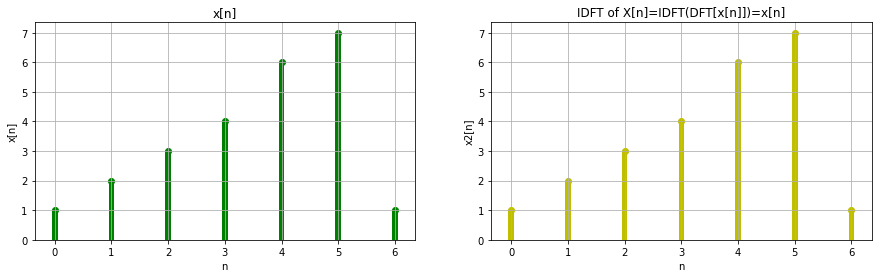

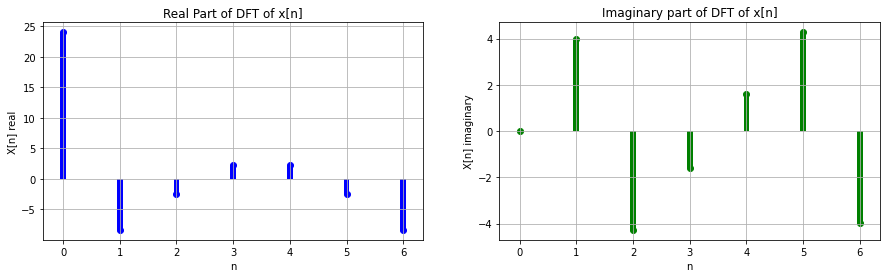

In [2]:
#----------------------------------DFT & IDFT---------------------------------------------#
import matplotlib.pyplot as plt
import numpy as np
import cmath
def DFT(s,M):
    S=[]
    for k in range(M):
        p=0
        for n in range(M):
            y=-2*np.pi*k*n/M
            exp=complex(np.cos(y),np.sin(y))
            p+=s[n]*exp
        S.append(p)
    return S
def IDFT(S,M):
    R=[]
    for n in range(M):
        p=0
        for k in range(M):
            y=2j*np.pi*k*n/M
            exp=np.exp(y)
            p+=S[k]*exp
        if p.imag<10**-4:
            p+=np.conj(p)
            p=p/2
        R.append(p/M)
    return R
x=np.array([1,2,3,4,6,7,1])
x2=np.empty([len(x)])
N=len(x)
n=np.arange(0,N,1)
X=np.empty([N])
X=DFT(x,N)
x2=IDFT(X,N)
fig=1
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(n,x,color='g')
plt.bar(n,x,color='g',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x[n]')
fig+=1
plt.subplot(1,2,2)
plt.scatter(n,x2,color='y')
plt.bar(n,x2,color='y',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('x2[n]')
plt.title('IDFT of X[n]=IDFT(DFT[x[n]])=x[n]')
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
for i in range(len(X)):
    plt.scatter(i,X[i].real,color='b')
    plt.bar(i,X[i].real,color='b',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('X[n] real')
plt.title('Real Part of DFT of x[n]')
plt.subplot(1,2,2)
for i in range(len(X)):    
    plt.scatter(i,X[i].imag,color='g')
    plt.bar(i,X[i].imag,color='g',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('X[n] imaginary')
plt.title('Imaginary part of DFT of x[n]')
fig+=1

Text(0, 0.5, 'Y[k]')

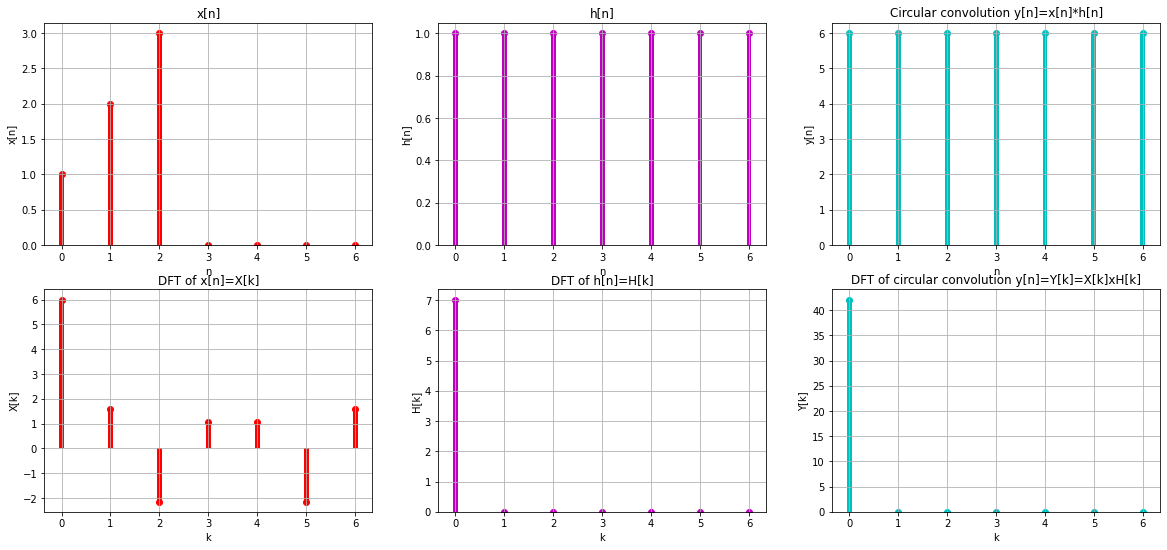

In [3]:
#-----------------------------------Circular Convolution----------------------#
def circon(x,y):
    v=[]
    for m in range(len(x)):
        p=0
        for n in range(len(x)):
            if m>=n:
                p+=x[n]*y[m-n]
            else:
                p+=x[n]*y[m-n+len(x)]
        v.append(p)
    return v
x=np.array([1,2,3,0,0,0,0])
n=np.arange(0,len(x),1)
h=np.array([1,1,1,1,1,1,1])
y=circon(x,h)
X=DFT(x,len(x))
H=DFT(h,len(h))
Y=[]
for i in range(len(x)):
    Y.append(X[i]*H[i])
y2=IDFT(Y,len(Y))
plt.figure(fig,figsize=(20,9))
fig+=1
plt.subplot(2,3,1)
plt.scatter(n,x,color='r')
plt.bar(n,x,color='r',width=0.1)
plt.grid('True')
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.subplot(2,3,2)
plt.scatter(n,h,color='m')
plt.bar(n,h,color='m',width=0.1)
plt.title('h[n]')
plt.grid('True')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.subplot(2,3,3)
plt.scatter(n,y,color='c')
plt.title('Circular convolution y[n]=x[n]*h[n]')
plt.bar(n,y,color='c',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.subplot(2,3,4)
plt.scatter(n,X,color='r')
plt.bar(n,X,color='r',width=0.1)
plt.title('DFT of x[n]=X[k]')
plt.grid('True')
plt.xlabel('k')
plt.ylabel('X[k]')
plt.subplot(2,3,5)
plt.scatter(n,H,color='m')
plt.title('DFT of h[n]=H[k]')
plt.bar(n,H,color='m',width=0.1)
plt.grid('True')
plt.xlabel('k')
plt.ylabel('H[k]')
plt.subplot(2,3,6)
plt.scatter(n,Y,color='c')
plt.title('DFT of circular convolution y[n]=Y[k]=X[k]xH[k]')
plt.bar(n,Y,color='c',width=0.1)
plt.grid('True')
plt.xlabel('k')
plt.ylabel('Y[k]')

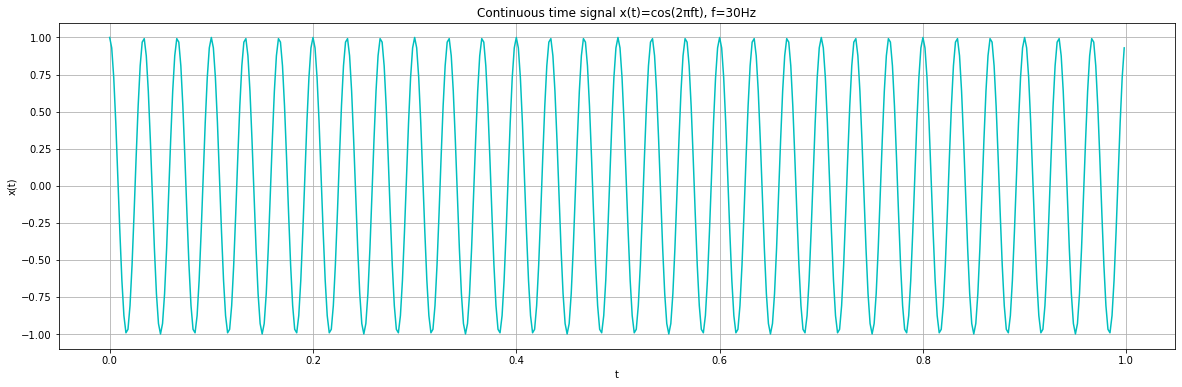

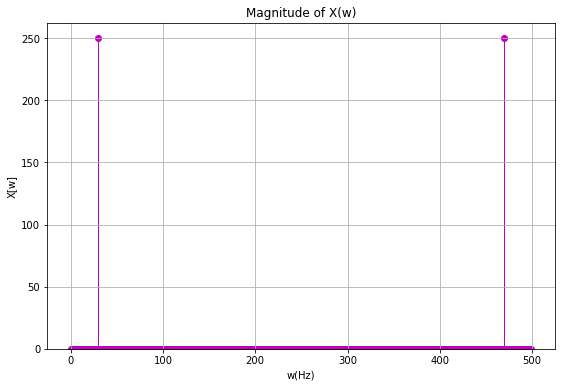

In [22]:
t=np.arange(0,1,0.002)
f=30
x=np.cos(2*np.pi*f*t)
n=np.arange(0,len(t),1)
X=DFT(x,len(x))
plt.figure(fig,figsize=(20,6))
fig+=1
plt.plot(t,x,color='c')
plt.xlabel('t')
plt.title('Continuous time signal x(t)=cos(2πft), f=30Hz')
plt.ylabel('x(t)')
plt.grid('true')
plt.figure(fig,figsize=(20,6))
plt.subplot(1,2,1)
for i in range(len(X)):
    plt.scatter(i,abs(X[i]),color='m')
    plt.bar(i,abs(X[i]),color='m')
plt.title('Magnitude of X(w)')
plt.xlabel('w(Hz)')
plt.ylabel('X[w]')
plt.grid('true')

In [35]:
#------------------------------------DFT AND IDFT----------------------------------#
def dot2decimal(x):
    for i in range(len(x)):
        tr="%.2f"%x[i].real
        ti="%.2f"%x[i].imag
        x[i]=complex(float(tr),float(ti))
    return(x)
x=np.array([1,-3,1,5])
y=np.array([7,-7,-9,-3])
h=circon(x,y)
print('circular convolution of x=',x,' and y=',y,'is h=',h)
X=DFT(x,len(x))
Y=DFT(y,len(y))
H=DFT(h,len(y))
H2=[]
for i in range(len(X)):
    t3r=X[i].real*Y[i].real-X[i].imag*Y[i].imag
    t3i=Y[i].imag*X[i].real+Y[i].real*X[i].imag
    H2.append(complex(float(t3r),float(t3i)))
h2=IDFT(H2,len(H2))
X=dot2decimal(X)
Y=dot2decimal(Y)
H=dot2decimal(H)
h2=dot2decimal(h2)
    
print("\nDFT of x[n]=",x,"is X[k]=",X,"\nDFT of y[n]=",y," is Y[k]=",Y,"\nDFT of h[n]=",h," is H[k]=",H)
print("\nh calculated using circular convolution x[n]*y[n] is \nh[n]=",h,"\nh calculated using IDFT of X[k]xY[k]=H[k] is\nh[n]=",h2)


circular convolution of x= [ 1 -3  1  5]  and y= [ 7 -7 -9 -3] is h= [-28, -76, 4, 52]

DFT of x[n]= [ 1 -3  1  5] is X[k]= [(4+0j), (-0+8j), -0j, -8j] 
DFT of y[n]= [ 7 -7 -9 -3]  is Y[k]= [(-12+0j), (16+4j), (8-0j), (16-4j)] 
DFT of h[n]= [-28, -76, 4, 52]  is H[k]= [(-48+0j), (-32+128j), -0j, (-32-128j)]

h calculated using circular convolution x[n]*y[n] is 
h[n]= [-28, -76, 4, 52] 
h calculated using IDFT of X[k]xY[k]=H[k] is
h[n]= [(-28+0j), (-76+0j), (4+0j), (52+0j)]


In [75]:
#-------------------------------------------- ENERGY OF A SIGNAL -------------------------------#
n=np.arange(0,50,1)
x=[0.75**i for i in range(len(n))]
t1=0
t2=0
for i in x:
    t1+=i**2
print("Energy of the sequence x[n]=(3/4)^n*u[n] is =",t1)
X=DFT(x,len(x))
for i in X:
    t2+=abs(i)**2
t2=t2/len(x)
print("Energy of the sequence using DFT of x[n] is =",t2)

Energy of the sequence x[n]=(3/4)^n*u[n] is = 2.2857142857135524
Energy of the sequence using DFT of x[n] is = 2.2857142857135515


In [44]:
#---------------------------------------DISCRETE COSINE TRANSFORM--------------------------------------#
def dct(x):
    N=len(x)
    X=np.empty([len(x)])
    z=np.sqrt(2/N)
    for m in range(len(x)):
        p=0
        if m==0:
            cm=1/np.sqrt(2)
        else:
            cm=1
        for n in range(len(x)):
            p+=x[n]*cm*np.cos(np.pi*m*(2*n+1)/(2*N))
        p=p*z
        X[m]=p
    return X
def idct(X):
    N=len(X)
    x=np.empty([len(X)])
    z=np.sqrt(2/N)
    for n in range(len(X)):
        p=0
        for m in range(len(X)):
            if m==0:
                cm=1/np.sqrt(2)
            else:
                cm=1
            p+=X[m]*cm*np.cos(np.pi*m*(2*n+1)/(2*N))
        p=p*z
        x[n]=p
    return x
x=[8,16,24,32,40,48,56,64]
n=np.arange(0,len(x),1)
m=n
X=dct(x)
X2=np.empty([len(X)])
x2=idct(X)
for i in range(len(x)):
    X[i]="%.2f"%X[i]
print("DCT of x[n]=",x,"\nis X(m)=",X)
print("\nIDCT of X(m)=",X,"\nis x[n]=",x2)
for i in range(len(X)):
    if i<4:
        X2[i]=X[i]
    else:
        X2[i]=0
x3=idct(X2)
print("\nSequence obtained when keeping only first 4 terms of DCT of x[n]=",x,"\nis x2[n]=",x3)
t=0
t2=0
for i in range(len(x3)):
    t+=x3[i]**2
    t2+=x[i]**2
print("\nEnergy of signal x[n] is\t\t\t\t\t\t\t   =",t2,"\nEnergy of signal x2[n] which is obtained by IDCT of X(m) with only first 4 terms is=",t)
error=0
for i in range(len(x)):
    error+=(x[i]-x3[i])**2
    error=np.sqrt(error)
print("\nThe mean square error between x[n] and x2[n] which is obtained by finding IDCT of X(m) with only first 4 terms is\nErms=",error)
X_DFT=dot2decimal(DFT(x,len(x)))
print("\nThe DFT of x[n]=",x,"is X[k]=",X_DFT)
X2_DFT=np.empty([len(x)])
for i in range(4,len(x)):
    X_DFT[i]=0
x4=IDFT(X_DFT,len(X_DFT))
x4=dot2decimal(x4)
print("\nSequence obtained when keeping only first 4 terms of DFT of x[n]=",x,"\nis x2[n]=",x4)
error=0
for i in range(len(x)):
    error+=(x[i]-abs(x4[i]))**2
    error=np.sqrt(error)
print("\nThe mean square error between x[n] and x3[n] which is obtained by finding IDFT of X[k] with only first 4 terms is\nErms=",error)

DCT of x[n]= [8, 16, 24, 32, 40, 48, 56, 64] 
is X(m)= [101.82 -51.54  -0.    -5.39  -0.    -1.61  -0.    -0.41]

IDCT of X(m)= [101.82 -51.54  -0.    -5.39  -0.    -1.61  -0.    -0.41] 
is x[n]= [ 8. 16. 24. 32. 40. 48. 56. 64.]

Sequence obtained when keeping only first 4 terms of DCT of x[n]= [8, 16, 24, 32, 40, 48, 56, 64] 
is x2[n]= [ 8.48315895 15.09760274 24.32497766 32.46859041 39.52902205 47.6726348
 56.90000972 63.51445351]

Energy of signal x[n] is							   = 13056 
Energy of signal x2[n] which is obtained by IDCT of X(m) with only first 4 terms is= 13052.736099999995

The mean square error between x[n] and x2[n] which is obtained by finding IDCT of X(m) with only first 4 terms is
Erms= 1.27640690741402

The DFT of x[n]= [8, 16, 24, 32, 40, 48, 56, 64] is X[k]= [(288+0j), (-32+77.25j), (-32+32j), (-32+13.25j), (-32-0j), (-32-13.25j), (-32-32j), (-32-77.25j)]

Sequence obtained when keeping only first 4 terms of DFT of x[n]= [8, 16, 24, 32, 40, 48, 56, 64] 
is x2[n]= [(24+15.

Text(0, 0.5, 'magnitude of IDFT of X[k]=x3[n]')

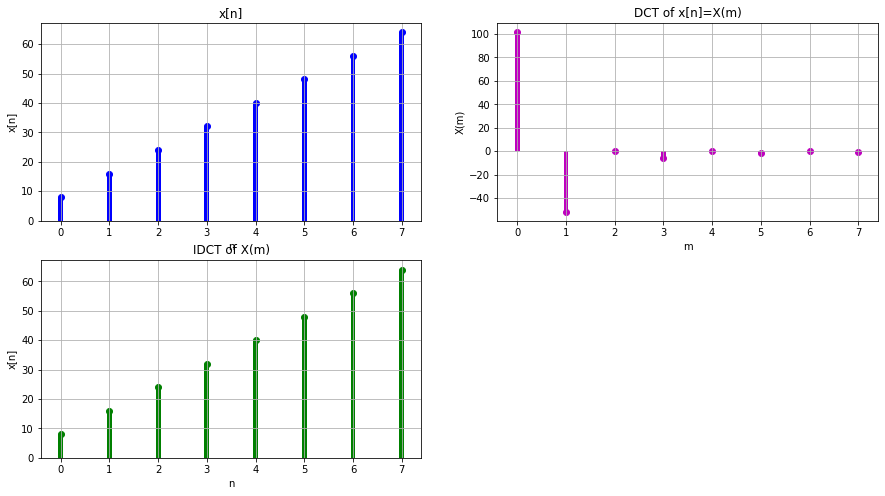

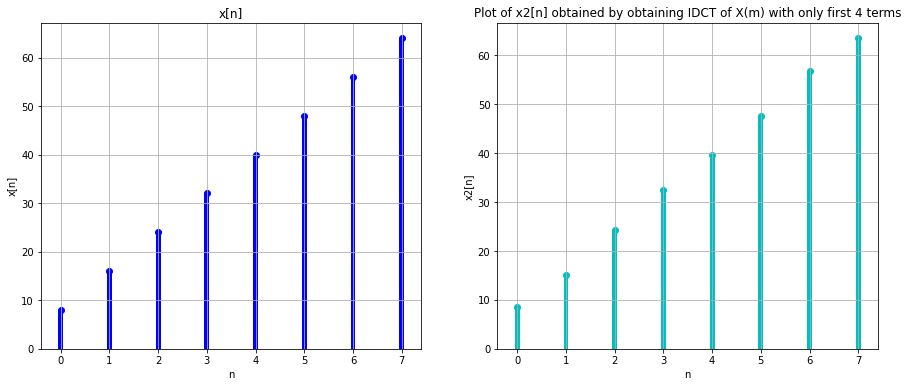

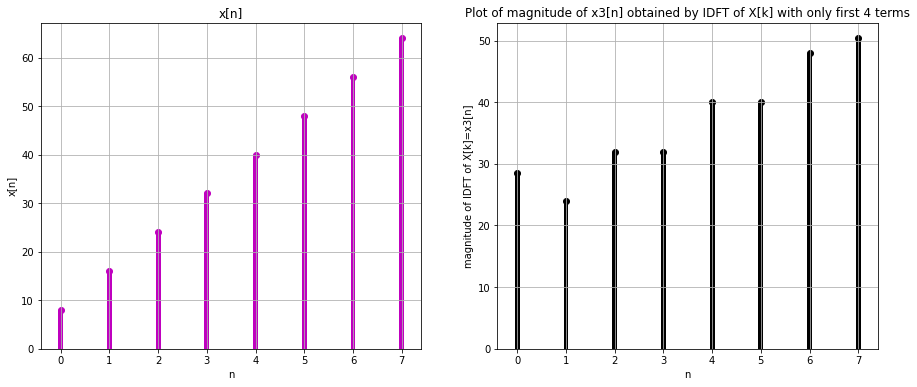

In [42]:
#----------------------------------------Plots for various sequences and DCT-----------------------------------#
plt.figure(fig,figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(n,x,color='b')
plt.grid('true')
plt.bar(n,x,color='b',width=0.1)
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.subplot(2,2,2)
plt.scatter(m,X,color='m')
plt.bar(m,X,color='m',width=0.1)
plt.grid('true')
plt.title('DCT of x[n]=X(m)')
plt.xlabel('m')
plt.ylabel('X(m)')
plt.subplot(2,2,3)
plt.grid('true')
plt.scatter(n,x2,color='g')
plt.bar(n,x,color='g',width=0.1)
plt.title('IDCT of X(m)')
plt.xlabel('n')
plt.ylabel('x[n]')
fig+=1
plt.figure(fig,figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(n,x,color='b')
plt.bar(n,x,color='b',width=0.1)
plt.title("x[n]")
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid('true')
plt.subplot(1,2,2)
plt.scatter(n,x3,color='c')
plt.grid('true')
plt.bar(n,x3,width=0.1,color='c')
plt.title('Plot of x2[n] obtained by obtaining IDCT of X(m) with only first 4 terms')
plt.xlabel('n')
plt.ylabel('x2[n]')
fig+=1
plt.figure(fig,figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(n,x,color='m')
plt.bar(n,x,color='m',width=0.1)
plt.title("x[n]")
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid('true')
plt.subplot(1,2,2)
plt.grid('true')
for i in n:
    plt.scatter(i,abs(x4[i]),color='k')
    plt.bar(i,abs(x4[i]),width=0.1,color='k')
plt.title('Plot of magnitude of x3[n] obtained by IDFT of X[k] with only first 4 terms')
plt.xlabel('n')
plt.ylabel('magnitude of IDFT of X[k]=x3[n]')